In [1]:
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
if os.environ.get("AITUEDATA"):
    print('set')
    data_directory = os.environ['AITUEDATA']
else:
    print('not set')
    #Eusebio
    data_directory = "C:/Users/joaquin/Desktop/mem_aitue/Datos/"
    #Mini-Eusebio
#     data_directory = "C:/Users/jquin/Desktop/Memoria de Titulo/Aitue/Datos/"
    #PC-Mem
#     data_directory = "C:/Users/Joaquin/Desktop/mem_aitue/Datos/"

set


In [40]:
personas = pd.read_csv(data_directory+'Datos/personas_cotizacion.csv',encoding = "ISO-8859-1")
# personas = pd.read_csv(data_directory+'personas.csv')
personas = personas.drop(personas.columns[0], axis=1)
personas = personas.drop(['rut'], axis=1)
personas = pd.get_dummies(personas)
personas.head()

,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_telefono,max_rango_edad,mean_cot_bod,...,loc_comuna_Otro,loc_comuna_Penco,loc_comuna_San Pedro de la Paz,loc_comuna_Talcahuano,loc_provincia_Concepcion,loc_provincia_Otro,loc_provincia_Santiago,loc_region_Bio-Bio,loc_region_Metropolitana,loc_region_Otro
0,True,True,True,False,True,True,True,True,0,0.5,...,0,0,0,0,1,0,0,1,0,0
1,True,True,True,False,False,True,True,True,0,0.0,...,0,0,0,0,1,0,0,1,0,0
2,True,True,True,False,False,True,True,False,50,1.0,...,0,0,0,0,1,0,0,1,0,0
3,True,True,True,True,False,True,True,False,50,1.0,...,0,0,0,0,1,0,0,1,0,0
4,True,True,True,False,False,True,True,False,0,1.0,...,0,0,0,0,1,0,0,1,0,0


In [41]:
personas.columns

Index(['is_apellido1', 'is_appelido2', 'is_celular', 'is_direccion', 'is_fnac',
       'is_nombre', 'is_nombrecompleto', 'is_telefono', 'max_rango_edad',
       'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'Altos del Valle',
       'Edificio Urban 1470', 'San Andres Del Valle', 'Edificio Mil610',
       'Edificio Junge', 'loc_comuna_Antofagasta', 'loc_comuna_Chiguayante',
       'loc_comuna_Concepción', 'loc_comuna_Coronel', 'loc_comuna_Hualpén',
       'loc_comuna_Los Ángeles', 'loc_comuna_Otro', 'loc_comuna_Penco',
       'loc_comuna_San Pedro de la Paz', 'loc_comuna_Talcahuano',
       'loc_provincia_Concepcion', 'loc_provincia_Otro',
       'loc_provincia_Santiago', 'loc_region_Bio-Bio',
       'loc_region_Metropolitana', 'loc_region_Otro'],
      dtype='object')

In [42]:
p_negocio = personas.negocio
personas = personas.drop('negocio',axis=1)

In [43]:
personas.head()

,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_telefono,max_rango_edad,mean_cot_bod,...,loc_comuna_Otro,loc_comuna_Penco,loc_comuna_San Pedro de la Paz,loc_comuna_Talcahuano,loc_provincia_Concepcion,loc_provincia_Otro,loc_provincia_Santiago,loc_region_Bio-Bio,loc_region_Metropolitana,loc_region_Otro
0,True,True,True,False,True,True,True,True,0,0.5,...,0,0,0,0,1,0,0,1,0,0
1,True,True,True,False,False,True,True,True,0,0.0,...,0,0,0,0,1,0,0,1,0,0
2,True,True,True,False,False,True,True,False,50,1.0,...,0,0,0,0,1,0,0,1,0,0
3,True,True,True,True,False,True,True,False,50,1.0,...,0,0,0,0,1,0,0,1,0,0
4,True,True,True,False,False,True,True,False,0,1.0,...,0,0,0,0,1,0,0,1,0,0


In [44]:
personas.columns

Index(['is_apellido1', 'is_appelido2', 'is_celular', 'is_direccion', 'is_fnac',
       'is_nombre', 'is_nombrecompleto', 'is_telefono', 'max_rango_edad',
       'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu',
       'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta', 'nro_cot_estu',
       'nro_proyectos', 'Altos del Valle', 'Edificio Urban 1470',
       'San Andres Del Valle', 'Edificio Mil610', 'Edificio Junge',
       'loc_comuna_Antofagasta', 'loc_comuna_Chiguayante',
       'loc_comuna_Concepción', 'loc_comuna_Coronel', 'loc_comuna_Hualpén',
       'loc_comuna_Los Ángeles', 'loc_comuna_Otro', 'loc_comuna_Penco',
       'loc_comuna_San Pedro de la Paz', 'loc_comuna_Talcahuano',
       'loc_provincia_Concepcion', 'loc_provincia_Otro',
       'loc_provincia_Santiago', 'loc_region_Bio-Bio',
       'loc_region_Metropolitana', 'loc_region_Otro'],
      dtype='object')

# Clustering

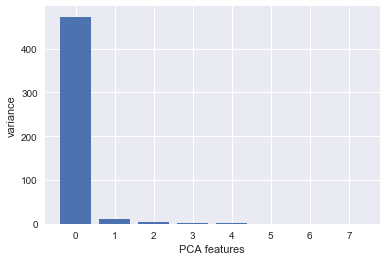

In [45]:
from sklearn.decomposition import PCA
#check variance
pca = PCA(n_components = 8)
pca.fit(personas)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA features')
plt.show()


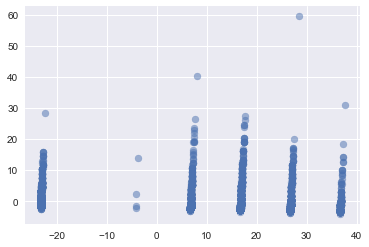

In [46]:
pca = PCA(n_components = 2)
pca.fit(personas)
transformed = pca.transform(personas)

# xs = pca.fit_transform(personas)[:, 0]
# ys = pca.fit_transform(personas)[:, 1]

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,alpha=0.5)
plt.show()

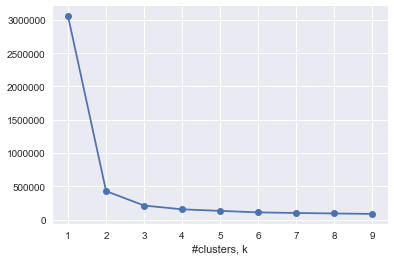

In [47]:
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(personas)
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias, '-o')
plt.xlabel('#clusters, k')
plt.xticks(ks)
plt.show()

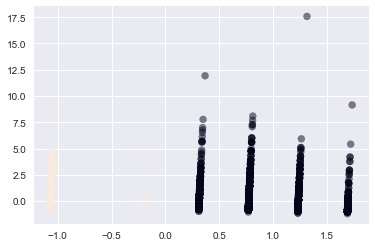

In [51]:
#Clustering
km = KMeans(n_clusters=2, max_iter=300, random_state=None)
clusters = km.fit_predict(personas)
personas['cluster'] = km.fit_predict(personas)

# Principal Component Analysis
pca = PCA(n_components=2, whiten=True)
pca.fit(personas)

xs = pca.fit_transform(personas)[:, 0]
ys = pca.fit_transform(personas)[:, 1]

plt.scatter(xs ,ys, c=clusters,alpha=0.5)
plt.show()


In [11]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'personas': personas['cluster'], 'negocio': p_negocio})

# Create crosstab: ct
ct = pd.crosstab(df['personas'],df['negocio'])

# Display ct
print(ct)

negocio   False  True 
personas              
0          3147    306
1          2630    101


In [53]:
personas.groupby('cluster').mean()

,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_telefono,max_rango_edad,mean_cot_bod,...,loc_comuna_Otro,loc_comuna_Penco,loc_comuna_San Pedro de la Paz,loc_comuna_Talcahuano,loc_provincia_Concepcion,loc_provincia_Otro,loc_provincia_Santiago,loc_region_Bio-Bio,loc_region_Metropolitana,loc_region_Otro
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.991212,0.952398,0.994874,0.116075,0.063713,1.0,1.0,0.117539,0.027829,0.149644,...,0.087514,0.002929,0.054193,0.037715,0.905529,0.054925,0.039546,0.931161,0.040644,0.028195
1,1.000000,0.973357,0.998262,0.291630,0.201853,1.0,1.0,0.119606,41.514625,0.121376,...,0.098175,0.013322,0.088039,0.070084,0.884159,0.077034,0.038807,0.925862,0.040255,0.033884


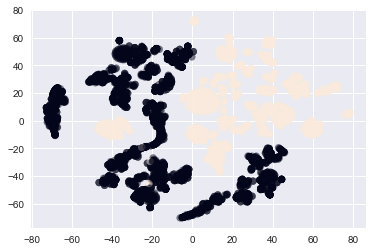

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, max_iter=300, random_state=None)
personas['cluster'] = km.fit_predict(personas)

from sklearn.manifold import TSNE

model = TSNE(learning_rate = 100)
transformed = model.fit_transform(personas)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=personas['cluster'],alpha=0.5)
plt.show()

In [14]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'personas': personas['cluster'], 'negocio': p_negocio})

# Create crosstab: ct
ct = pd.crosstab(df['personas'],df['negocio'])

# Display ct
print(ct)

negocio   False  True 
personas              
0          3147    306
1          2630    101


In [15]:
personas.groupby('cluster')['negocio'].mean()

# Supervised Learning: Classification

In [56]:
personas = personas.drop(['cluster'],axis=1)
# p_negocio = personas.negocio
# personas = personas.drop('negocio',axis=1)

In [57]:
print("Tamaño Total: ",personas.shape)
print("Personas que hicieron Negocio: ",p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ",p_negocio[p_negocio == False].shape)

Tamaño Total:  (6184, 39)
Personas que hicieron Negocio:  (407,)
Personas que no Hicieorn Negocio:  (5777,)


In [58]:
# y = personas.negocio
# X = personas.drop('negocio',axis=1)
X = personas
y = p_negocio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(3710, 39) (2474, 39) (3710,) (2474,)


## KNeighbors

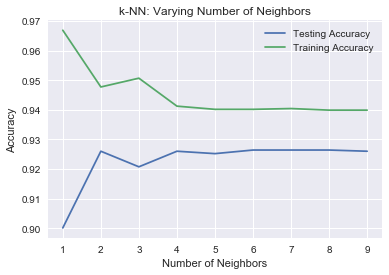

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.926030719483
[[2291    2]
 [ 181    0]]
             precision    recall  f1-score   support

      False       0.93      1.00      0.96      2293
       True       0.00      0.00      0.00       181

avg / total       0.86      0.93      0.89      2474



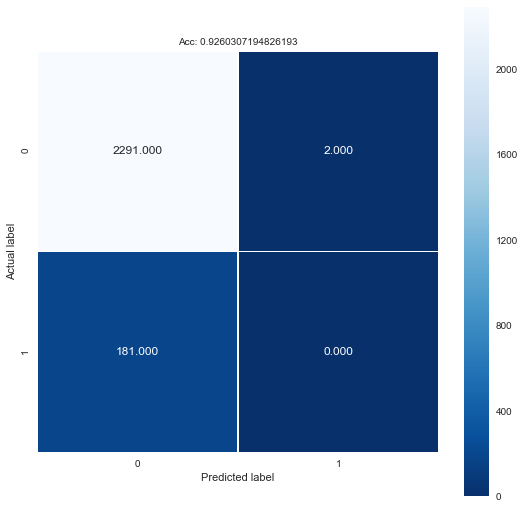

In [60]:
#KNeighbors

# Import necessary modules
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier()


param_grid = {'n_neighbors': np.arange(1, 10)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
print(knn_cv)
# Fit the classifier to the training data
knn_cv.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn_cv.predict(X_test)

print(knn_cv.score(X_test, y_test))

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Acc: {0}'.format(knn_cv.score(X_test, y_test))
plt.title(all_sample_title, size = 10);
plt.show()
# plt.savefig('foo.png')

## LogisticRegression

In [61]:
#LogisticRegression
# Import necessary modules

from sklearn.linear_model import LogisticRegression

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}


# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

y_pred = logreg_cv.predict(X_test)

Tuned Logistic Regression Parameters: {'C': 0.43939705607607948, 'penalty': 'l2'}
Best score is 0.9362871927554981
             precision    recall  f1-score   support

      False       0.93      1.00      0.96      2293
       True       0.88      0.04      0.07       181

avg / total       0.93      0.93      0.90      2474



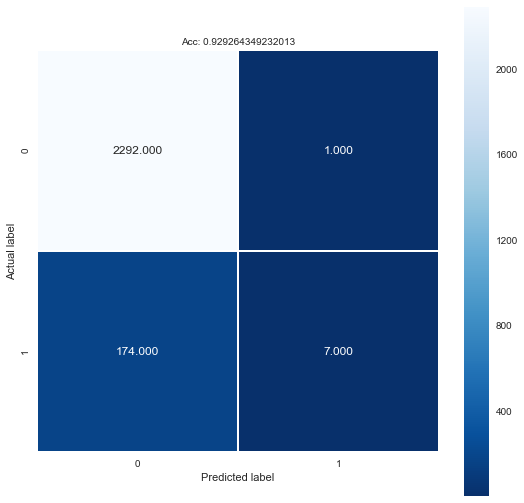

In [62]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Acc: {0}'.format(logreg_cv.score(X_test, y_test))
plt.title(all_sample_title, size = 10);
plt.show()
# plt.savefig('foo.png')

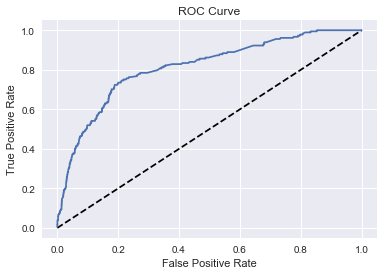

In [63]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, treshold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [64]:
from sklearn.metrics import roc_auc_score

y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_pred_prob)

0.81220649924222887

## DecisionTree

In [65]:
#Tree

# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 30),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

y_pred = tree_cv.predict(X_test)

In [66]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
print(classification_report(y_test, y_pred))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 17, 'min_samples_leaf': 2}
Best score is 0.9401617250673855
             precision    recall  f1-score   support

      False       0.93      1.00      0.96      2293
       True       0.48      0.06      0.10       181

avg / total       0.90      0.93      0.90      2474



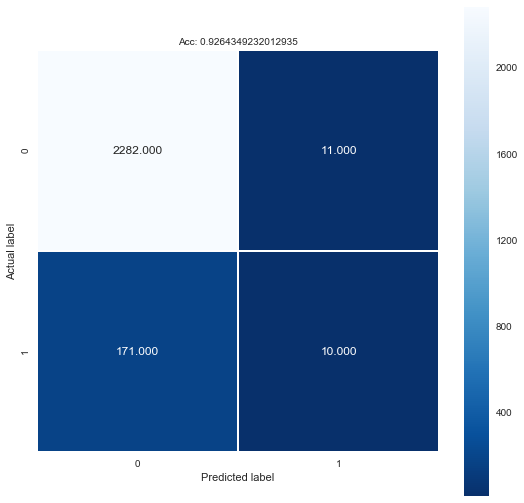

In [67]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Acc: {0}'.format(tree_cv.score(X_test, y_test))
plt.title(all_sample_title, size = 10);
plt.show()
# plt.savefig('foo.png')
